In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [15]:
m_cols = ["label","message","idf",'dsa','ada']
data = pd.read_csv('spam.csv', sep=',', names=m_cols , encoding='latin-1')


In [ ]:
data = data.drop(axis=1,columns=["idf",'dsa','ada'],inplace=True)

In [22]:
data['label_num'] = data.label.map({'ham':0,'spam':1})

In [24]:
data = data.loc[1:]

In [125]:
data.head()

,label,message,label_num
1,ham,"Go until jurong point, crazy.. Available only ...",0.0
2,ham,Ok lar... Joking wif u oni...,0.0
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1.0
4,ham,U dun say so early hor... U c already then say...,0.0
5,ham,"Nah I don't think he goes to usf, he lives aro...",0.0


In [ ]:
#split train and split data

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(data["message"],data["label"], test_size = 0.2, random_state = 10)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4457,)
(1115,)
(4457,)
(1115,)


In [ ]:
#Preproceesing of data, changing the words into vector representation of integers representing the count of unique words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vect = CountVectorizer()

In [35]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [38]:
print(vect.get_feature_names()[1:20])

['000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']


In [39]:
x_train_cv = vect.transform(X_train)

In [40]:
x_test_cv = vect.transform(X_test)

In [43]:
type(x_test_cv)

scipy.sparse.csr.csr_matrix

In [44]:
ham_words = ''
spam_words = ''
spam = data[data.label_num == 1]
ham = data[data.label_num ==0]


In [46]:
import nltk

In [47]:
from nltk.corpus import stopwords

In [126]:
for val in spam.message:
    text = val.lower()
    token  = nltk.word_tokenize(text)
    tokens = [word for word in token if word not in stopwords.words('english')]
    for word in tokens:
        spam_words = spam_words+word+' '
        
for val in ham.message:
    text = val.lower()
    token  = nltk.word_tokenize(text)
    tokens = [word for word in token if word not in stopwords.words('english')]
    for word in tokens:
        ham_words = ham_words+word+' '

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ramgopal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [63]:
from wordcloud import WordCloud

In [127]:
spam_cloud = WordCloud(width=600,height=400).generate(spam_words)

In [128]:
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

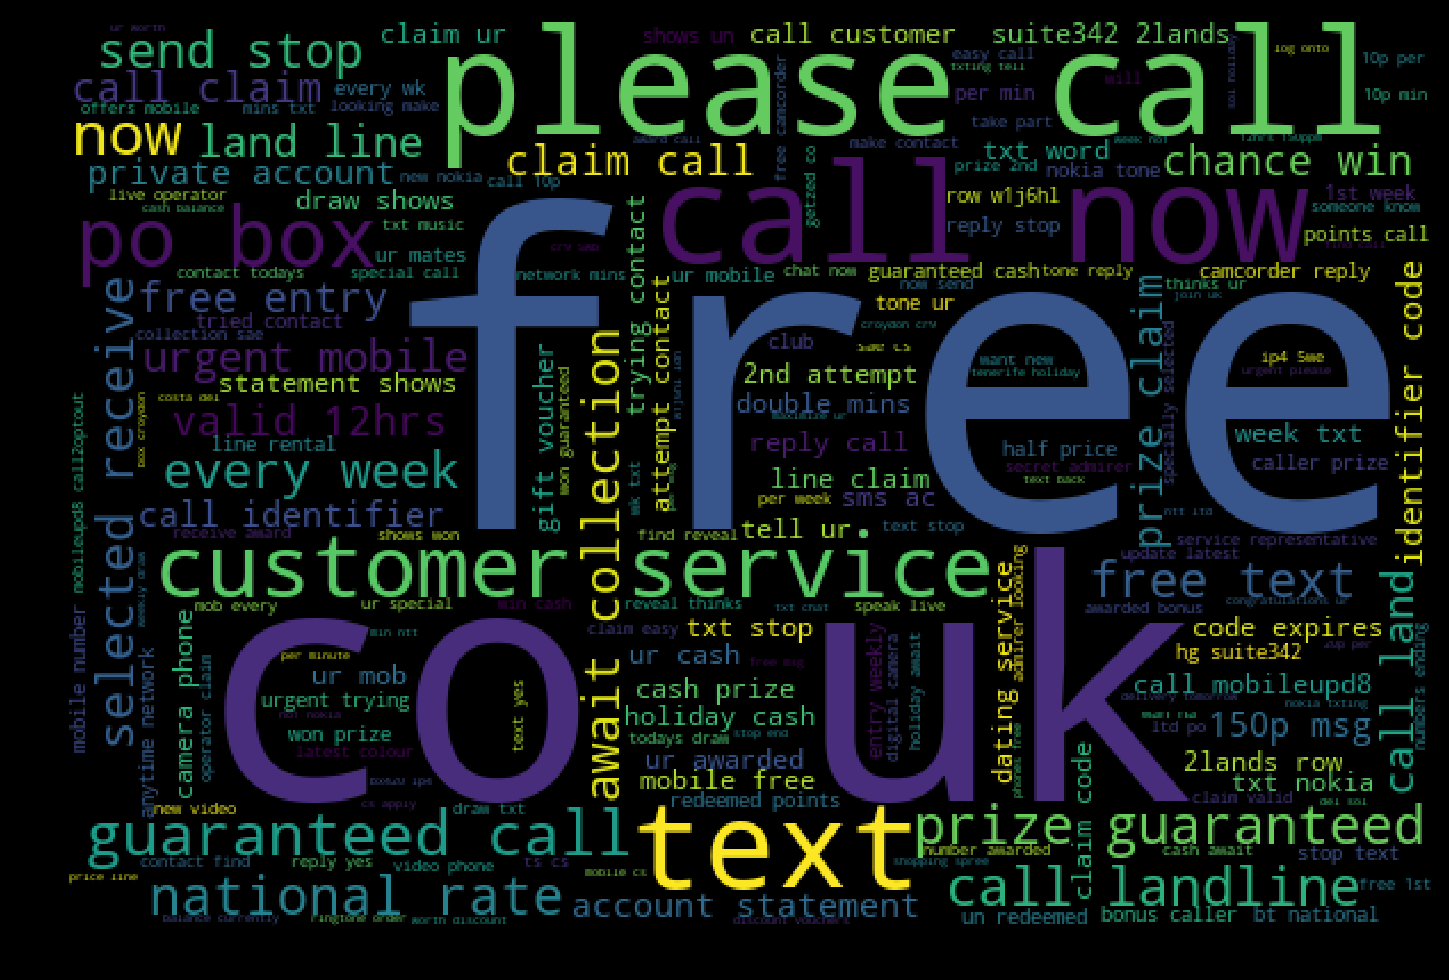

In [129]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

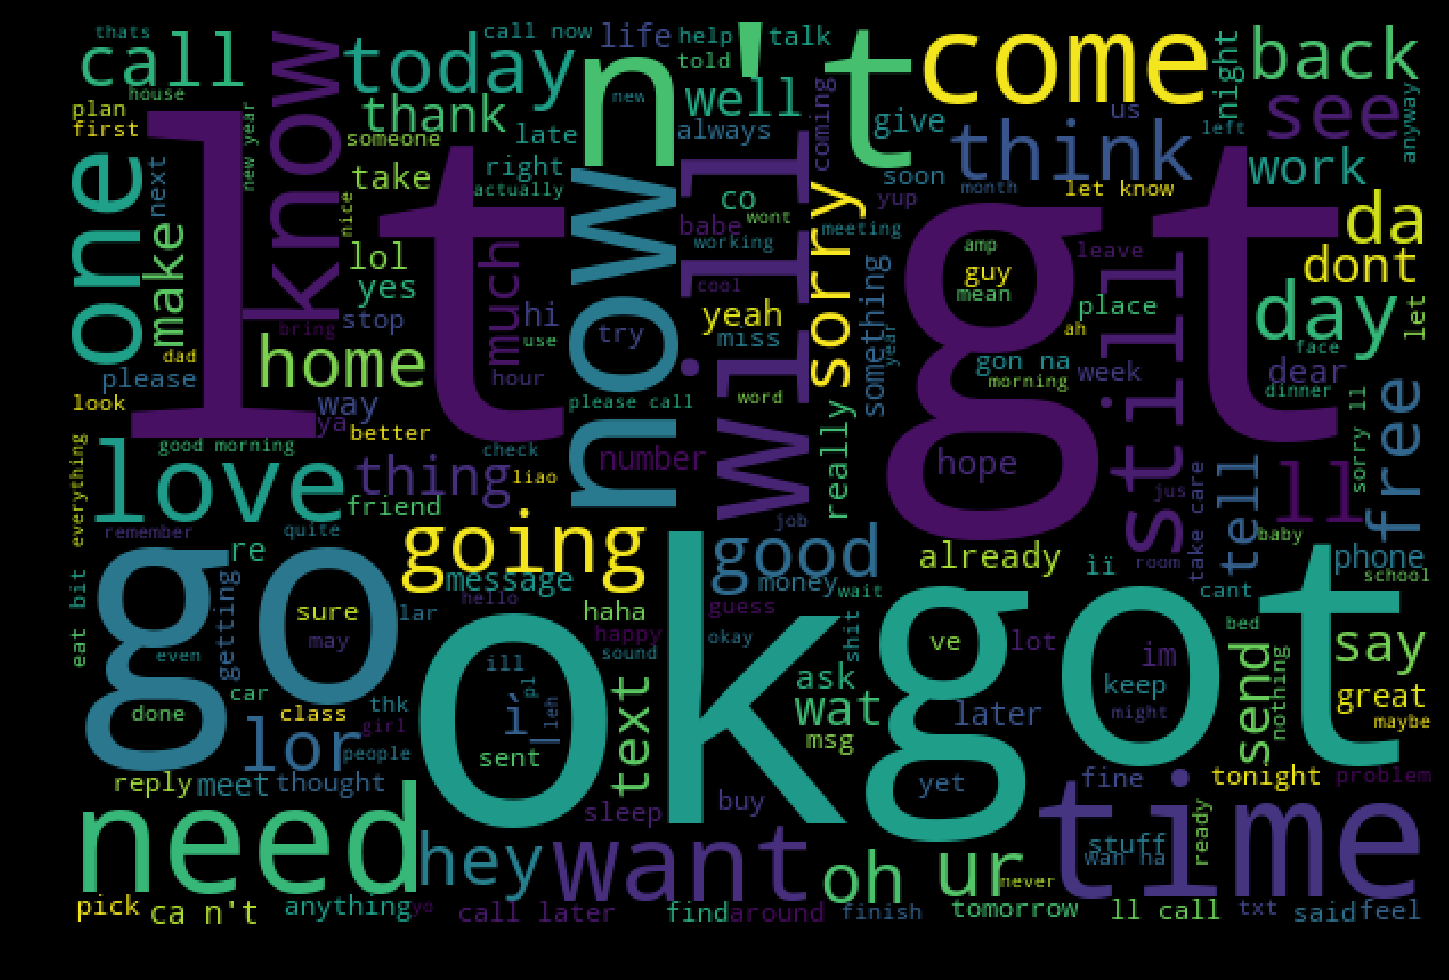

In [130]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [77]:
prediction = dict()

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
model = MultinomialNB()

In [80]:
model.fit(x_train_cv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
prediction["bayers"] = model.predict(x_test_cv)

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [84]:
print(confusion_matrix(y_test,prediction["bayers"]))

[[960   5]
 [  8 142]]


In [85]:
print(accuracy_score(y_test,prediction['bayers']))

0.9883408071748879


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()
model.fit(x_train_cv,y_train)
prediction["regression"] = model.predict(x_test_cv)

In [88]:
print(confusion_matrix(y_test,prediction["regression"]))
print(accuracy_score(y_test,prediction['regression']))

[[962   3]
 [ 19 131]]
0.9802690582959641


In [100]:
from sklearn.neighbors import KNeighborsClassifier


In [101]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_cv,y_train)
prediction["knn"] = model.predict(x_test_cv)

In [102]:
print(confusion_matrix(y_test,prediction["knn"]))
print(accuracy_score(y_test,prediction['knn']))

[[965   0]
 [ 98  52]]
0.9121076233183857


In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
model = RandomForestClassifier()
model.fit(x_train_cv,y_train)
prediction["forest"] = model.predict(x_test_cv)

In [108]:
print(confusion_matrix(y_test,prediction["forest"]))
print(accuracy_score(y_test,prediction['forest']))

[[964   1]
 [ 38 112]]
0.9650224215246637


In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
model = AdaBoostClassifier()
model.fit(x_train_cv,y_train)
prediction["adaboost"] = model.predict(x_test_cv)

In [109]:
print(confusion_matrix(y_test,prediction["adaboost"]))
print(accuracy_score(y_test,prediction['adaboost']))

[[957   8]
 [ 28 122]]
0.967713004484305


In [ ]:
# Misclassified as Spam

In [124]:
X_test[y_test < prediction["adaboost"]]

1791    Am not working but am up to eyes in philosophy...
1140    Message:some text missing* Sender:Name Missing...
3823    Please protect yourself from e-threats. SIB ne...
172     Hmmm.. Thk sure got time to hop ard... Ya, can...
397     Was actually sleeping and still might when u c...
1260    We have sent JD for Customer Service cum Accou...
1497    I'm always on yahoo messenger now. Just send t...
495                      Are you free now?can i call now?
Name: message, dtype: object